<a href="https://colab.research.google.com/github/CHUsharon/109BIGDATA/blob/master/%E3%80%8C1217%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(SportsAnalytics)

In [6]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")

In [7]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



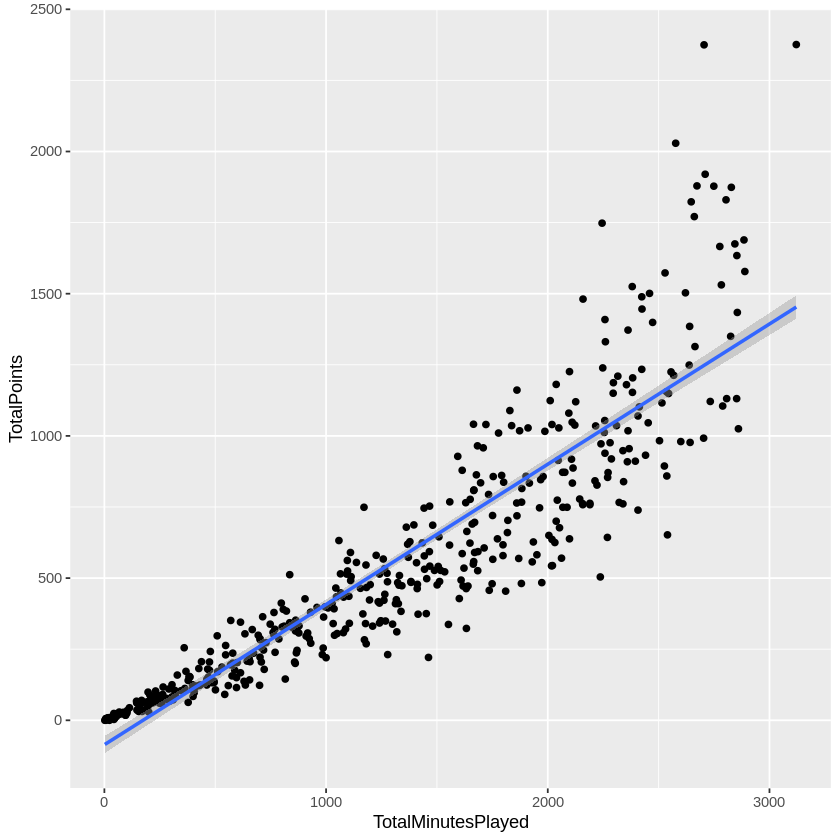

In [8]:
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [9]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [10]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [13]:
# Load the libraries
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [17]:
#讀入SportsAnalytics package
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}
#擷取2018-2019年球季球員資料
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [23]:
sample(1:nrow(NBA1819),nrow(NBA1819)/3) #從第一行到最後一行,隨機取1/3行數

[1]  80 272  17 180 524 487  45 312 193 526 494 396 371 306 354  99 458  88
 [19] 227 339 335 431  89   7 310   3  25 346 425 465 483 323 309  18 300  95
 [37] 219  37 254  24 191 271  72 136  86 445 378  50 279 124 496 192 443 160
 [55]  20 449 285 380 141 204 197 217 418 406  82 416 207 360  79 215 188 190
 [73]  63 462 111 261  71 392 410 297 143  33 138  97 405 303 451 510   1 129
 [91] 251 525 299  19 203 148  21   9 414 289  61 198 337 514 109 240 262  78
[109] 394 357  64 239 506 236 125 463 305 423  85 164 200 505 480 313 444 101
[127] 428 454 457  34 245 475 293 273 115 274 296 321 468  91 333 277 256 372
[145]  57 503 281 140 283  23  52  35 504 502  75 233 426 104 120 411  27 223
[163] 110 389 450 257 399 182 527  43 471  67  49  42 382 108

In [25]:
NBA1819$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1819[sample(1:nrow(NBA1819),nrow(NBA1819)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1819$Test==F),sum(NBA1819$Test==T))

[1] 353 176

In [26]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1819[NBA1819$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),18.86353648,7.704133537,2.448496,1.484417e-02
TotalMinutesPlayed,0.01089619,0.007887039,1.381531,1.680123e-01
FieldGoalsAttempted,1.02159892,0.026548352,38.480690,1.093786e-126
PositionPF,-14.25890818,8.383601765,-1.700809,8.988251e-02
PositionPG,-47.93876757,8.888925968,-5.393089,1.290287e-07
PositionSF,-35.92291388,8.761621213,-4.100030,5.159237e-05
PositionSG,-37.79054386,8.787126755,-4.300671,2.221121e-05
ThreesAttempted,0.06589411,0.030657452,2.149367,3.230243e-02
FreeThrowsAttempted,0.74354996,0.048777603,15.243676,1.888989e-40


In [21]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients
##根據AIC,做逐步選擇, 往前學習 direction = "forward"
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),27.49159688,8.892093945,3.091690,2.172229e-03
TotalMinutesPlayed,-0.01466586,0.008314211,-1.763951,7.873162e-02
FieldGoalsAttempted,1.03095333,0.025394354,40.597738,1.133002e-125
PositionPF,-30.38817244,9.239487695,-3.288946,1.122135e-03
PositionPG,-55.46018432,10.130076317,-5.474804,9.097094e-08
PositionSF,-39.56556126,10.558722459,-3.747192,2.134750e-04
PositionSG,-44.06132736,10.227436635,-4.308150,2.216792e-05
ThreesAttempted,0.19906316,0.032604744,6.105343,3.084094e-09
FreeThrowsAttempted,0.69838875,0.041839840,16.691955,5.335130e-45


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),27.49159688,8.892093945,3.091690,2.172229e-03
TotalMinutesPlayed,-0.01466586,0.008314211,-1.763951,7.873162e-02
FieldGoalsAttempted,1.03095333,0.025394354,40.597738,1.133002e-125
PositionPF,-30.38817244,9.239487695,-3.288946,1.122135e-03
PositionPG,-55.46018432,10.130076317,-5.474804,9.097094e-08
PositionSF,-39.56556126,10.558722459,-3.747192,2.134750e-04
PositionSG,-44.06132736,10.227436635,-4.308150,2.216792e-05
ThreesAttempted,0.19906316,0.032604744,6.105343,3.084094e-09
FreeThrowsAttempted,0.69838875,0.041839840,16.691955,5.335130e-45


In [27]:
sample(1:10,3) # 從1到10,隨機取三個數字

[1] 9 2 3

In [29]:
sample(1:nrow(NBA1819),nrow(NBA1819)/3) #從第一行到最後一行,隨機取1/3行數

[1]   2 263 491 422 365 111 529  56 436  51 419 142  92 317 217 506 149 454
 [19] 199 135 308 291 151 123  47   9 144 314 241 281  64 438  41 443  53  88
 [37] 516 392 188 214 145 384 466  67   1 273 368 280 349 431 131 115 222 197
 [55] 525  75  72 523 237 442 101 232 202 302 374 473 333 416 400 396 270 112
 [73] 518  93  20  34 195 512  18 364 316 425 289 339  83 386 343 524  16 265
 [91] 411 293 152 227 110  99 252 164 220 354  68 459 134 492 462 297 278 324
[109]  14 203 180 107 471 390 108 394 457  52 470 344 154  38 109 179 284 125
[127] 301 447 331  17 136 510 254 247  91 370 184  39  84 257  13 245 157 140
[145]  40 521 255 520 207 376 165 488 141 326 380 174 162 464 430 163 177 268
[163] 434 209 175 526 104 218 513  22 185  28 120 224 476 347

In [30]:
NBA1819$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1819[sample(1:nrow(NBA1819),nrow(NBA1819)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1819$Test==F),sum(NBA1819$Test==T))

[1] 353 176

In [31]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1819[NBA1819$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.85911117,6.883062403,1.868225,6.258059e-02
TotalMinutesPlayed,0.02415161,0.007490014,3.224508,1.382813e-03
FieldGoalsAttempted,0.98603807,0.025546826,38.597283,4.695809e-127
PositionPF,-15.54777017,7.778331761,-1.998857,4.641031e-02
PositionPG,-43.59248179,8.238589999,-5.291255,2.167684e-07
PositionSF,-26.84077896,7.997810474,-3.356016,8.790902e-04
PositionSG,-32.80499665,7.927496739,-4.138128,4.407385e-05
ThreesAttempted,0.03870012,0.029954653,1.291957,1.972394e-01
FreeThrowsAttempted,0.80860776,0.047329610,17.084606,8.091756e-48


In [32]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.62473077,6.66870483,1.593223,1.120260e-01
TotalMinutesPlayed,0.02603599,0.00735375,3.540505,4.541632e-04
FieldGoalsAttempted,1.00223279,0.02228171,44.980075,2.254700e-146
PositionPF,-13.67592802,7.64961287,-1.787793,7.468690e-02
PositionPG,-40.97515378,7.99336783,-5.126144,4.937060e-07
PositionSF,-24.38996828,7.77711645,-3.136120,1.859147e-03
PositionSG,-29.80375250,7.58684378,-3.928347,1.033256e-04
FreeThrowsAttempted,0.77891511,0.04141507,18.807528,8.137467e-55


In [33]:
##根據AIC,做逐步選擇, 往前學習 direction = "forward"
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.85911117,6.883062403,1.868225,6.258059e-02
TotalMinutesPlayed,0.02415161,0.007490014,3.224508,1.382813e-03
FieldGoalsAttempted,0.98603807,0.025546826,38.597283,4.695809e-127
PositionPF,-15.54777017,7.778331761,-1.998857,4.641031e-02
PositionPG,-43.59248179,8.238589999,-5.291255,2.167684e-07
PositionSF,-26.84077896,7.997810474,-3.356016,8.790902e-04
PositionSG,-32.80499665,7.927496739,-4.138128,4.407385e-05
ThreesAttempted,0.03870012,0.029954653,1.291957,1.972394e-01
FreeThrowsAttempted,0.80860776,0.047329610,17.084606,8.091756e-48


In [34]:
##根據AIC,做逐步選擇, 雙向學習 direction = "both"
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.62473077,6.66870483,1.593223,1.120260e-01
TotalMinutesPlayed,0.02603599,0.00735375,3.540505,4.541632e-04
FieldGoalsAttempted,1.00223279,0.02228171,44.980075,2.254700e-146
PositionPF,-13.67592802,7.64961287,-1.787793,7.468690e-02
PositionPG,-40.97515378,7.99336783,-5.126144,4.937060e-07
PositionSF,-24.38996828,7.77711645,-3.136120,1.859147e-03
PositionSG,-29.80375250,7.58684378,-3.928347,1.033256e-04
FreeThrowsAttempted,0.77891511,0.04141507,18.807528,8.137467e-55


In [35]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1819[NBA1819$Test==T,])

cor(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints) #相關係數

[1] 0.9962663

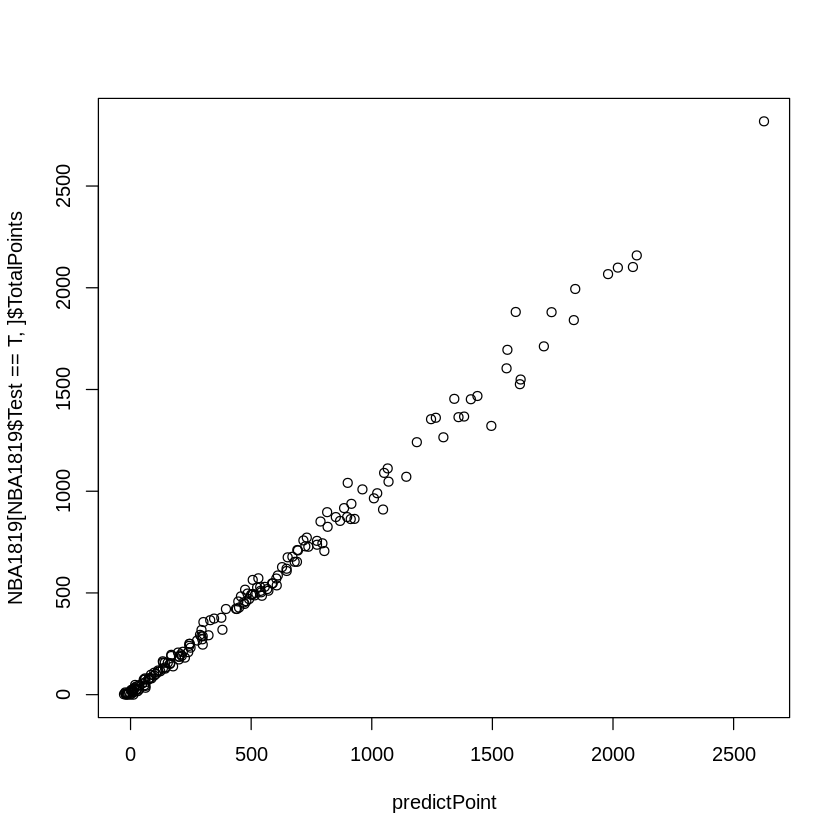

In [37]:
plot(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)

In [39]:
mydata <- read.csv("https://ncku.ml/WZZQ")
mydata$admit <- factor(mydata$admit) # 類別變項要轉為factor
mydata$rank <- factor(mydata$rank) # 類別變項要轉為factor
mydata$Test<-F #新增一個參數紀錄分組
mydata[sample(1:nrow(mydata),nrow(mydata)/3),"Test"]<-T #隨機取1/3當Test set
c(sum(mydata$Test==F),sum(mydata$Test==T)) # Training set : Test set學生數

[1] 267 133

In [41]:
#修改一下factor的level: 改成Level 2為錄取,1為不錄取-->Level 2 要放正面答案
mydata$admit<-factor(mydata$admit,levels=c(1,2))

In [42]:
# GRE:某考試成績, GPA:在校平均成績, rank:學校聲望
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata[mydata$Test==F,], family = "binomial")
finalFit<-stepAIC(mylogit,direction = "both",trace=FALSE) # 雙向逐步選擇模型
summary(finalFit)


Call:
glm(formula = admit ~ 1, family = "binomial", data = mydata[mydata$Test == 
    F, ])

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -26.57   38627.07  -0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 84  degrees of freedom
Residual deviance: 4.9313e-10  on 84  degrees of freedom
  (182 observations deleted due to missingness)
AIC: 2

Number of Fisher Scoring iterations: 25


In [43]:
AdmitProb<-predict(finalFit, # 用Training set做的模型
######
newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率

head(AdmitProb)

5            6            7            9           10           12 
2.900701e-12 2.900701e-12 2.900701e-12 2.900701e-12 2.900701e-12 2.900701e-12

In [44]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit) # row,column

       
         1  2
  FALSE 42  0

In [46]:
AdmitProb<-predict(finalFit,

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率
AdmitAns<-factor(ifelse(AdmitProb>0.5,1,0),levels=c(0,1))
str(AdmitAns)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:133] "5" "6" "7" "9" ...


In [47]:
library(caret) # install.packages("caret") #計算參數的packages
sensitivity(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")

ERROR: ignored